# DATA ANALYSIS

## MODULES & LIBRARIES

In [ ]:
#!pip install pandas_profiling

In [ ]:
! pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# IMPORT MODULES

# Base -----------------------------------------------------------
import numpy as np
import pandas as pd
from scipy.stats import norm
from datetime import datetime
#import pandas_profiling

# Viz ------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine
from plotnine import *
#import patchworklib as pw

In [ ]:
import time
from datetime import timedelta

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## DATA "BMUs LIST"

In [ ]:
#filepath = '/content/GD_Fede/MyDrive/IE - DS Boot/_Project/Data/Research/BM Units (historical info)/bmusid_21_23 (COMPLETE).xlsx'
#filepath = 'C:/Users/FAL/Desktop/QEnergy/Data/Research/BM Units (historical info)/bmusid_21_23 (COMPLETE).xlsx'
file_path = '/content/drive/MyDrive/QEnergy/Data/Research/BM Units (historical info)/bmusid_21_23 (COMPLETE).xlsx'

In [ ]:
bmusid_21_23 = pd.read_excel(file_path)

In [ ]:
selected_cols = ['BMU Type', 'BMU ID', 'BMU Fuel Type',
                 'BMU GSP Group Id', 'BMU GSP Group Name', 'LOC LAT', 'LOC LONG',
                 'GSP LOC Center', 'LOC Center LAT', 'LOC Center LONG']

In [ ]:
bmusid_21_23 = bmusid_21_23[selected_cols]
bmusid_21_23

,BMU Type,BMU ID,BMU Fuel Type,BMU GSP Group Id,BMU GSP Group Name,LOC LAT,LOC LONG,GSP LOC Center,LOC Center LAT,LOC Center LONG
0,E,E_GYAR-1,CCGT,_A,Eastern England,52.583834,1.733725,Dalham,52.226649,0.519993
1,E,E_KLYN-A-1,CCGT,_A,Eastern England,52.727436,0.380419,Dalham,52.226649,0.519993
2,E,E_PETEM1,OCGT,_A,Eastern England,52.576835,-0.204150,Dalham,52.226649,0.519993
3,T,T_COSO-1,CCGT,_A,Eastern England,51.512797,0.505550,Dalham,52.226649,0.519993
4,T,T_LBAR-1,CCGT,_A,Eastern England,52.203604,-0.269046,Dalham,52.226649,0.519993
...,...,...,...,...,...,...,...,...,...,...
452,T,T_MOWEO-3,WIND,_P,Northern Scotland,58.077384,-3.121303,Kingussie,57.229009,-4.078819
453,T,T_MOWEO-1,WIND,_P,Northern Scotland,58.077384,-3.121303,Kingussie,57.229009,-4.078819
454,2,2__PEDGE003,WIND,_P,Northern Scotland,58.357068,-3.254377,Kingussie,57.229009,-4.078819
455,2,2__PEDGE004,WIND,_P,Northern Scotland,57.981817,-4.498357,Kingussie,57.229009,-4.078819


## DATA "BMUs Historic"

In [ ]:
#file_path = '/content/GD_Fede/MyDrive/IE - DS Boot/_Project/Data/Research/BM Units (historical info)/tabla_bmu_id (COMPLETE).xlsx'
#file_path = 'C:/Users/FAL/Desktop/QEnergy/Data/Research/BM Units (historical info)/tabla_bmu_id (COMPLETE).xlsx'
file_path = '/content/drive/MyDrive/QEnergy/Data/Research/BM Units (historical info)/tabla_bmu_id (COMPLETE).xlsx'

In [ ]:
bmu_histinfo = pd.read_excel(file_path)

In [ ]:
selected_cols = ['BMU ID', 'BMU Party ID', 'BMU Party Name', 'Trading Unit', 'PC Flag', 'PC Status',
                 'Transmission Loss Factor', 'Generation Capacity', 'Demand Capacity',
                 'Exempt Export Flag', 'Base TU Flag', 'FPN Flag', 'Effective From Date', 'Effective To Date']

In [ ]:
bmu_histinfo = bmu_histinfo[selected_cols]
bmu_histinfo['Effective From Date'] = pd.to_datetime(bmu_histinfo['Effective From Date'])
bmu_histinfo['Effective To Date'] = pd.to_datetime(bmu_histinfo['Effective To Date'])
bmu_histinfo.head()

<ipython-input-70-d6984053b2f1>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
<ipython-input-70-d6984053b2f1>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.


,BMU ID,BMU Party ID,BMU Party Name,Trading Unit,PC Flag,PC Status,Transmission Loss Factor,Generation Capacity,Demand Capacity,Exempt Export Flag,Base TU Flag,FPN Flag,Effective From Date,Effective To Date
0,E_GYAR-1,Great Yarmouth Power Limited,GYPL,NaN,NaN,Production (P),0.0,418.0,-22.0,False (F),False (F),True (T),2004-01-12,2005-02-28
1,E_GYAR-1,Great Yarmouth Power Limited,GYPL,NaN,NaN,Production (P),0.0,418.0,-22.0,False (F),False (F),True (T),2005-01-03,2005-05-31
2,E_GYAR-1,Great Yarmouth Power Limited,GYPL,NaN,NaN,Production (P),0.0,418.0,-22.0,False (F),False (F),True (T),2005-01-06,2005-08-31
3,E_GYAR-1,Great Yarmouth Power Limited,GYPL,NaN,NaN,Production (P),0.0,418.0,-22.0,False (F),False (F),True (T),2005-01-09,2005-11-30
4,E_GYAR-1,Great Yarmouth Power Limited,GYPL,NaN,NaN,Production (P),0.0,418.0,-22.0,False (F),False (F),True (T),2005-01-12,2006-02-28


In [ ]:
bmu_histinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18833 entries, 0 to 18832
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   BMU ID                    18833 non-null  object        
 1   BMU Party ID              18833 non-null  object        
 2   BMU Party Name            18833 non-null  object        
 3   Trading Unit              10731 non-null  object        
 4   PC Flag                   3988 non-null   object        
 5   PC Status                 18833 non-null  object        
 6   Transmission Loss Factor  18832 non-null  float64       
 7   Generation Capacity       18833 non-null  float64       
 8   Demand Capacity           18833 non-null  float64       
 9   Exempt Export Flag        18833 non-null  object        
 10  Base TU Flag              18833 non-null  object        
 11  FPN Flag                  18833 non-null  object        
 12  Effective From Dat

In [ ]:
len(bmu_histinfo['BMU ID'].unique())

457

## ANALYSIS

#### - BMU INFO DATASET

In [ ]:
bmuinfo = bmusid_21_23.copy()
bmuinfo

,BMU Type,BMU ID,BMU Fuel Type,BMU GSP Group Id,BMU GSP Group Name,LOC LAT,LOC LONG,GSP LOC Center,LOC Center LAT,LOC Center LONG
0,E,E_GYAR-1,CCGT,_A,Eastern England,52.583834,1.733725,Dalham,52.226649,0.519993
1,E,E_KLYN-A-1,CCGT,_A,Eastern England,52.727436,0.380419,Dalham,52.226649,0.519993
2,E,E_PETEM1,OCGT,_A,Eastern England,52.576835,-0.204150,Dalham,52.226649,0.519993
3,T,T_COSO-1,CCGT,_A,Eastern England,51.512797,0.505550,Dalham,52.226649,0.519993
4,T,T_LBAR-1,CCGT,_A,Eastern England,52.203604,-0.269046,Dalham,52.226649,0.519993
...,...,...,...,...,...,...,...,...,...,...
452,T,T_MOWEO-3,WIND,_P,Northern Scotland,58.077384,-3.121303,Kingussie,57.229009,-4.078819
453,T,T_MOWEO-1,WIND,_P,Northern Scotland,58.077384,-3.121303,Kingussie,57.229009,-4.078819
454,2,2__PEDGE003,WIND,_P,Northern Scotland,58.357068,-3.254377,Kingussie,57.229009,-4.078819
455,2,2__PEDGE004,WIND,_P,Northern Scotland,57.981817,-4.498357,Kingussie,57.229009,-4.078819


In [ ]:
new_cols = ['BMU Party ID', 'BMU Party Name', 'Trading Unit', 'PC Flag', 'PC Status',
            'Transmission Loss Factor', 'Generation Capacity', 'Demand Capacity', 'Credit Assessment Load Factor',
            'BMU Credit Assessment Export Capability', 'BMU Credit Assessment Import Capability',
            'Exempt Export Flag', 'Base TU Flag', 'FPN Flag', 'Interconnector']

In [ ]:
for x in new_cols:
  bmuinfo[x] = np.nan

In [ ]:
bmuinfo.isnull().sum()

BMU Type                                     0
BMU ID                                       0
BMU Fuel Type                                0
BMU GSP Group Id                             0
BMU GSP Group Name                           0
LOC LAT                                      0
LOC LONG                                     0
GSP LOC Center                               0
LOC Center LAT                               0
LOC Center LONG                              0
BMU Party ID                               457
BMU Party Name                             457
Trading Unit                               457
PC Flag                                    457
PC Status                                  457
Transmission Loss Factor                   457
Generation Capacity                        457
Demand Capacity                            457
Credit Assessment Load Factor              457
BMU Credit Assessment Export Capability    457
BMU Credit Assessment Import Capability    457
Exempt Export

In [ ]:
bmuinfo.head()

,BMU Type,BMU ID,BMU Fuel Type,BMU GSP Group Id,BMU GSP Group Name,LOC LAT,LOC LONG,GSP LOC Center,LOC Center LAT,LOC Center LONG,...,Transmission Loss Factor,Generation Capacity,Demand Capacity,Credit Assessment Load Factor,BMU Credit Assessment Export Capability,BMU Credit Assessment Import Capability,Exempt Export Flag,Base TU Flag,FPN Flag,Interconnector
0,E,E_GYAR-1,CCGT,_A,Eastern England,52.583834,1.733725,Dalham,52.226649,0.519993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E,E_KLYN-A-1,CCGT,_A,Eastern England,52.727436,0.380419,Dalham,52.226649,0.519993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E,E_PETEM1,OCGT,_A,Eastern England,52.576835,-0.204150,Dalham,52.226649,0.519993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,T,T_COSO-1,CCGT,_A,Eastern England,51.512797,0.505550,Dalham,52.226649,0.519993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T,T_LBAR-1,CCGT,_A,Eastern England,52.203604,-0.269046,Dalham,52.226649,0.519993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
start = time.time()

for i in range(0,bmuinfo.shape[0]):
        
    i_date = '2023-06-08'
    i_bmuid = bmuinfo.loc[i,'BMU ID']

    try:
        row = bmu_histinfo[(bmu_histinfo['BMU ID']==i_bmuid)&(bmu_histinfo['Effective From Date']<=i_date)&(bmu_histinfo['Effective To Date']>=i_date)].iloc[-1,:]
    except:
        try:
          row = bmu_histinfo[(bmu_histinfo['BMU ID']==i_bmuid)&(bmu_histinfo['Effective From Date']<=i_date)].iloc[-1,:]
        except:
          next

    bmuinfo.loc[i,new_cols] = row
    
    
    if (i==1) or (i%10000 == 0):
        end = time.time()
        print(i)
        print(timedelta(seconds=end-start))
        start = time.time()


0
0:00:00.049445
1
0:00:00.036901


In [ ]:
bmuinfo

,BMU Type,BMU ID,BMU Fuel Type,BMU GSP Group Id,BMU GSP Group Name,LOC LAT,LOC LONG,GSP LOC Center,LOC Center LAT,LOC Center LONG,...,Transmission Loss Factor,Generation Capacity,Demand Capacity,Credit Assessment Load Factor,BMU Credit Assessment Export Capability,BMU Credit Assessment Import Capability,Exempt Export Flag,Base TU Flag,FPN Flag,Interconnector
0,E,E_GYAR-1,CCGT,_A,Eastern England,52.583834,1.733725,Dalham,52.226649,0.519993,...,0.009287,420.0,-18.000,NaN,NaN,NaN,False (F),False (F),True (T),NaN
1,E,E_KLYN-A-1,CCGT,_A,Eastern England,52.727436,0.380419,Dalham,52.226649,0.519993,...,0.009287,392.0,-10.000,NaN,NaN,NaN,False (F),False (F),True (T),NaN
2,E,E_PETEM1,OCGT,_A,Eastern England,52.576835,-0.204150,Dalham,52.226649,0.519993,...,0.009287,245.0,-5.000,NaN,NaN,NaN,False (F),False (F),True (T),NaN
3,T,T_COSO-1,CCGT,_A,Eastern England,51.512797,0.505550,Dalham,52.226649,0.519993,...,0.009287,800.0,-11.664,NaN,NaN,NaN,False (F),False (F),True (T),NaN
4,T,T_LBAR-1,CCGT,_A,Eastern England,52.203604,-0.269046,Dalham,52.226649,0.519993,...,0.009287,750.0,-20.000,NaN,NaN,NaN,False (F),False (F),True (T),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,T,T_MOWEO-3,WIND,_P,Northern Scotland,58.077384,-3.121303,Kingussie,57.229009,-4.078819,...,-0.035117,300.0,-3.304,NaN,NaN,NaN,False (F),False (F),True (T),NaN
453,T,T_MOWEO-1,WIND,_P,Northern Scotland,58.077384,-3.121303,Kingussie,57.229009,-4.078819,...,-0.035117,300.0,-3.304,NaN,NaN,NaN,False (F),False (F),True (T),NaN
454,2,2__PEDGE003,WIND,_P,Northern Scotland,58.357068,-3.254377,Kingussie,57.229009,-4.078819,...,-0.035117,50.0,0.000,NaN,NaN,NaN,False (F),True (T),True (T),NaN
455,2,2__PEDGE004,WIND,_P,Northern Scotland,57.981817,-4.498357,Kingussie,57.229009,-4.078819,...,-0.035117,24.7,0.000,NaN,NaN,NaN,False (F),True (T),True (T),NaN


In [ ]:
bmuinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   BMU Type                                 457 non-null    object 
 1   BMU ID                                   457 non-null    object 
 2   BMU Fuel Type                            457 non-null    object 
 3   BMU GSP Group Id                         457 non-null    object 
 4   BMU GSP Group Name                       457 non-null    object 
 5   LOC LAT                                  457 non-null    float64
 6   LOC LONG                                 457 non-null    float64
 7   GSP LOC Center                           457 non-null    object 
 8   LOC Center LAT                           457 non-null    float64
 9   LOC Center LONG                          457 non-null    float64
 10  BMU Party ID                             457 non-n

In [ ]:
bmuinfo = bmuinfo.drop(columns=['BMU GSP Group Name', 'BMU Party Name', 'GSP LOC Center', 'LOC Center LAT', 'LOC Center LONG', 'Credit Assessment Load Factor', 
                                'BMU Credit Assessment Export Capability', 'BMU Credit Assessment Import Capability', 'Interconnector'], axis=1)
bmuinfo

,BMU Type,BMU ID,BMU Fuel Type,BMU GSP Group Id,LOC LAT,LOC LONG,BMU Party ID,Trading Unit,PC Flag,PC Status,Transmission Loss Factor,Generation Capacity,Demand Capacity,Exempt Export Flag,Base TU Flag,FPN Flag
0,E,E_GYAR-1,CCGT,_A,52.583834,1.733725,RWE Generation UK plc,NaN,NaN,Production (P),0.009287,420.0,-18.000,False (F),False (F),True (T)
1,E,E_KLYN-A-1,CCGT,_A,52.727436,0.380419,RWE Generation UK plc,NaN,NaN,Production (P),0.009287,392.0,-10.000,False (F),False (F),True (T)
2,E,E_PETEM1,OCGT,_A,52.576835,-0.204150,River Nene Power Limited,NaN,NaN,Production (P),0.009287,245.0,-5.000,False (F),False (F),True (T)
3,T,T_COSO-1,CCGT,_A,51.512797,0.505550,Coryton Energy Company Ltd,Coryton LG Trading Unit,NaN,Production (P),0.009287,800.0,-11.664,False (F),False (F),True (T)
4,T,T_LBAR-1,CCGT,_A,52.203604,-0.269046,RWE Generation UK plc,NaN,NaN,Production (P),0.009287,750.0,-20.000,False (F),False (F),True (T)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,T,T_MOWEO-3,WIND,_P,58.077384,-3.121303,Moray Offshore Wind East Ltd,NaN,NaN,Production (P),-0.035117,300.0,-3.304,False (F),False (F),True (T)
453,T,T_MOWEO-1,WIND,_P,58.077384,-3.121303,Moray Offshore Wind East Ltd,NaN,NaN,Production (P),-0.035117,300.0,-3.304,False (F),False (F),True (T)
454,2,2__PEDGE003,WIND,_P,58.357068,-3.254377,Edgware Energy Limited,DEFAULT__P,NaN,Consumption (C),-0.035117,50.0,0.000,False (F),True (T),True (T)
455,2,2__PEDGE004,WIND,_P,57.981817,-4.498357,Edgware Energy Limited,DEFAULT__P,NaN,Consumption (C),-0.035117,24.7,0.000,False (F),True (T),True (T)


In [ ]:
bmuinfo.isnull().sum()

BMU Type                      0
BMU ID                        0
BMU Fuel Type                 0
BMU GSP Group Id              0
LOC LAT                       0
LOC LONG                      0
BMU Party ID                  0
Trading Unit                195
PC Flag                     337
PC Status                     0
Transmission Loss Factor      0
Generation Capacity           0
Demand Capacity               0
Exempt Export Flag            0
Base TU Flag                  0
FPN Flag                      0
dtype: int64

In [ ]:
bmuinfo["Trading Unit"].fillna("Non-TrUnit", inplace = True)
bmuinfo["PC Flag"].fillna("Dynamic", inplace = True)

In [ ]:
bmuinfo.isnull().sum()

BMU Type                    0
BMU ID                      0
BMU Fuel Type               0
BMU GSP Group Id            0
LOC LAT                     0
LOC LONG                    0
BMU Party ID                0
Trading Unit                0
PC Flag                     0
PC Status                   0
Transmission Loss Factor    0
Generation Capacity         0
Demand Capacity             0
Exempt Export Flag          0
Base TU Flag                0
FPN Flag                    0
dtype: int64

In [ ]:
cols = ['Exempt Export Flag', 'Base TU Flag', 'FPN Flag']

In [ ]:
for x in cols:
  bmuinfo[x] = bmuinfo[x].apply(lambda x: 1 if x=='True (T)' else 0)

In [ ]:
bmuinfo

,BMU Type,BMU ID,BMU Fuel Type,BMU GSP Group Id,LOC LAT,LOC LONG,BMU Party ID,Trading Unit,PC Flag,PC Status,Transmission Loss Factor,Generation Capacity,Demand Capacity,Exempt Export Flag,Base TU Flag,FPN Flag
0,E,E_GYAR-1,CCGT,_A,52.583834,1.733725,RWE Generation UK plc,Non-TrUnit,Dynamic,Production (P),0.009287,420.0,-18.000,0,0,1
1,E,E_KLYN-A-1,CCGT,_A,52.727436,0.380419,RWE Generation UK plc,Non-TrUnit,Dynamic,Production (P),0.009287,392.0,-10.000,0,0,1
2,E,E_PETEM1,OCGT,_A,52.576835,-0.204150,River Nene Power Limited,Non-TrUnit,Dynamic,Production (P),0.009287,245.0,-5.000,0,0,1
3,T,T_COSO-1,CCGT,_A,51.512797,0.505550,Coryton Energy Company Ltd,Coryton LG Trading Unit,Dynamic,Production (P),0.009287,800.0,-11.664,0,0,1
4,T,T_LBAR-1,CCGT,_A,52.203604,-0.269046,RWE Generation UK plc,Non-TrUnit,Dynamic,Production (P),0.009287,750.0,-20.000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,T,T_MOWEO-3,WIND,_P,58.077384,-3.121303,Moray Offshore Wind East Ltd,Non-TrUnit,Dynamic,Production (P),-0.035117,300.0,-3.304,0,0,1
453,T,T_MOWEO-1,WIND,_P,58.077384,-3.121303,Moray Offshore Wind East Ltd,Non-TrUnit,Dynamic,Production (P),-0.035117,300.0,-3.304,0,0,1
454,2,2__PEDGE003,WIND,_P,58.357068,-3.254377,Edgware Energy Limited,DEFAULT__P,Dynamic,Consumption (C),-0.035117,50.0,0.000,0,1,1
455,2,2__PEDGE004,WIND,_P,57.981817,-4.498357,Edgware Energy Limited,DEFAULT__P,Dynamic,Consumption (C),-0.035117,24.7,0.000,0,1,1


In [ ]:
#file_path = 'C:/Users/FAL/Desktop/QEnergy/Data/data_2021.csv'
file_path = '/content/drive/MyDrive/QEnergy/Data/bmuinfo.csv'

In [ ]:
bmuinfo.to_csv(file_path, index=False)

#### - CLUSTERING

In [ ]:
bmuinfo = pd.read_csv(file_path)
bmuinfo

,BMU Type,BMU ID,BMU Fuel Type,BMU GSP Group Id,LOC LAT,LOC LONG,BMU Party ID,Trading Unit,PC Flag,PC Status,Transmission Loss Factor,Generation Capacity,Demand Capacity,Exempt Export Flag,Base TU Flag,FPN Flag
0,E,E_GYAR-1,CCGT,_A,52.583834,1.733725,RWE Generation UK plc,Non-TrUnit,Dynamic,Production (P),0.009287,420.0,-18.000,0,0,1
1,E,E_KLYN-A-1,CCGT,_A,52.727436,0.380419,RWE Generation UK plc,Non-TrUnit,Dynamic,Production (P),0.009287,392.0,-10.000,0,0,1
2,E,E_PETEM1,OCGT,_A,52.576835,-0.204150,River Nene Power Limited,Non-TrUnit,Dynamic,Production (P),0.009287,245.0,-5.000,0,0,1
3,T,T_COSO-1,CCGT,_A,51.512797,0.505550,Coryton Energy Company Ltd,Coryton LG Trading Unit,Dynamic,Production (P),0.009287,800.0,-11.664,0,0,1
4,T,T_LBAR-1,CCGT,_A,52.203604,-0.269046,RWE Generation UK plc,Non-TrUnit,Dynamic,Production (P),0.009287,750.0,-20.000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,T,T_MOWEO-3,WIND,_P,58.077384,-3.121303,Moray Offshore Wind East Ltd,Non-TrUnit,Dynamic,Production (P),-0.035117,300.0,-3.304,0,0,1
453,T,T_MOWEO-1,WIND,_P,58.077384,-3.121303,Moray Offshore Wind East Ltd,Non-TrUnit,Dynamic,Production (P),-0.035117,300.0,-3.304,0,0,1
454,2,2__PEDGE003,WIND,_P,58.357068,-3.254377,Edgware Energy Limited,DEFAULT__P,Dynamic,Consumption (C),-0.035117,50.0,0.000,0,1,1
455,2,2__PEDGE004,WIND,_P,57.981817,-4.498357,Edgware Energy Limited,DEFAULT__P,Dynamic,Consumption (C),-0.035117,24.7,0.000,0,1,1


In [ ]:
data = bmuinfo.copy()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4560.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 4560.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 4560.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 4560.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 4560.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 31, cost: 3982.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 33, cost: 3982.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


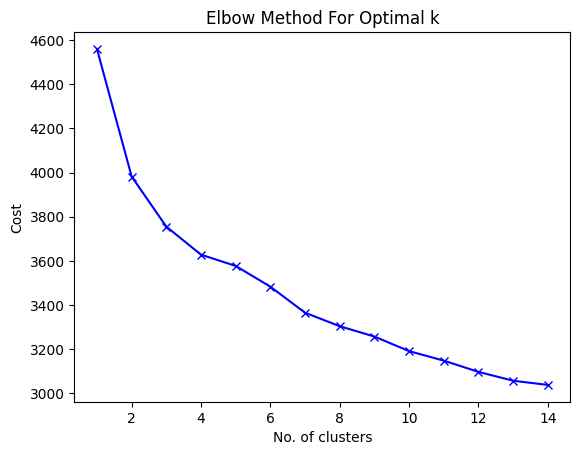

In [ ]:
# Elbow curve to find optimal K
cost = []
K = range(1,15)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=9, init = "random", n_init = 4, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 49, cost: 3437.0
Run 1, iteration: 2/100, moves: 14, cost: 3414.0
Run 1, iteration: 3/100, moves: 20, cost: 3412.0
Run 1, iteration: 4/100, moves: 0, cost: 3412.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 80, cost: 3337.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 38, cost: 3363.0
Run 3, iteration: 2/100, moves: 12, cost: 3361.0
Run 3, iteration: 3/100, moves: 0, cost: 3361.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 48, cost: 3330.0
Run 4, iteration: 2/100, moves: 26, cost: 3322.0
Run 4, iteration: 3/100, moves: 3, cost: 3322.0
Best run was number 4


array([8, 8, 2, 8, 8, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 6, 2, 2, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 8, 8, 8, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 3, 2, 0, 5, 4, 3, 3, 0, 4, 7, 0,
       4, 0, 0, 3, 2, 2, 2, 0, 7, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       8, 7, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 5, 5, 5, 5, 4, 4, 1, 1,
       7, 3, 0, 3, 0, 1, 0, 3, 4, 4, 0, 1, 3, 0, 0, 0, 7, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1,
       1, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 4, 8, 8, 2, 4, 4, 4, 4, 1,
       2, 2, 1, 0, 0, 7, 7, 0, 0, 7, 0, 4, 3, 4, 5, 0, 0, 4, 4, 1, 0, 1,
       5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 0, 5, 0, 0, 7, 7, 5, 1,
       1, 8, 8, 8, 8, 8, 2, 1, 2, 0, 0, 4, 4, 3, 4, 4, 0, 1, 2, 2, 8, 2,
       1, 1, 2, 0, 0, 5, 0, 0, 4, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 8, 4, 3, 3, 3, 3,

In [ ]:
data.insert(0, "Cluster", clusters, True)
data['Cluster'] = data['Cluster'].astype('category')
data

,Cluster,BMU Type,BMU ID,BMU Fuel Type,BMU GSP Group Id,LOC LAT,LOC LONG,BMU Party ID,Trading Unit,PC Flag,PC Status,Transmission Loss Factor,Generation Capacity,Demand Capacity,Exempt Export Flag,Base TU Flag,FPN Flag
0,8,E,E_GYAR-1,CCGT,_A,52.583834,1.733725,RWE Generation UK plc,Non-TrUnit,Dynamic,Production (P),0.009287,420.0,-18.000,0,0,1
1,8,E,E_KLYN-A-1,CCGT,_A,52.727436,0.380419,RWE Generation UK plc,Non-TrUnit,Dynamic,Production (P),0.009287,392.0,-10.000,0,0,1
2,2,E,E_PETEM1,OCGT,_A,52.576835,-0.204150,River Nene Power Limited,Non-TrUnit,Dynamic,Production (P),0.009287,245.0,-5.000,0,0,1
3,8,T,T_COSO-1,CCGT,_A,51.512797,0.505550,Coryton Energy Company Ltd,Coryton LG Trading Unit,Dynamic,Production (P),0.009287,800.0,-11.664,0,0,1
4,8,T,T_LBAR-1,CCGT,_A,52.203604,-0.269046,RWE Generation UK plc,Non-TrUnit,Dynamic,Production (P),0.009287,750.0,-20.000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2,T,T_MOWEO-3,WIND,_P,58.077384,-3.121303,Moray Offshore Wind East Ltd,Non-TrUnit,Dynamic,Production (P),-0.035117,300.0,-3.304,0,0,1
453,2,T,T_MOWEO-1,WIND,_P,58.077384,-3.121303,Moray Offshore Wind East Ltd,Non-TrUnit,Dynamic,Production (P),-0.035117,300.0,-3.304,0,0,1
454,0,2,2__PEDGE003,WIND,_P,58.357068,-3.254377,Edgware Energy Limited,DEFAULT__P,Dynamic,Consumption (C),-0.035117,50.0,0.000,0,1,1
455,0,2,2__PEDGE004,WIND,_P,57.981817,-4.498357,Edgware Energy Limited,DEFAULT__P,Dynamic,Consumption (C),-0.035117,24.7,0.000,0,1,1


In [ ]:
data['Trading Unit'].unique()

array(['Non-TrUnit', 'Coryton LG Trading Unit', 'DEFAULT__A',
       'Ratcliffe PS Trading Unit', 'Staythorpe Power Station',
       'DEFAULT__B', 'DEFAULT__C', 'DEFAULT__D',
       'CONNAHS QUAY PS TRADING UNIT', 'DINORWIG',
       'Ffestiniog Power Station', 'Rocksavage Trading Unit',
       'Gwynt y Mor', 'DEFAULT__E', 'DEFAULT__F', 'DEFAULT__G',
       'Cowes Power Station', 'Didcot B Power Station',
       'Didcot OCGT Power Station', 'DEFAULT__H', 'DEFAULT__J',
       'GRAIN PS TRADING UNIT', 'DEFAULT__K', 'Pembroke Power Station',
       'PYC Trading Unit', 'DEFAULT__L', 'Seabank Power Station',
       'Drax Power Station', 'IMMINGHAM CHP',
       'KILLINGHOLME PS TRADING UNIT', 'SALTEND1',
       'SOUTH HUMBER BANK P/S.', 'West Burton A&B Power Stations',
       'DEFAULT__M', 'DEFAULT__N', 'DEFAULT__P', 'Cruachan Power Station',
       'FOYERS POWER STATION', 'Carraig Gheal'], dtype=object)

In [ ]:
data['BMU Party ID'].unique()

array(['RWE Generation UK plc', 'River Nene Power Limited',
       'Coryton Energy Company Ltd', 'VPI Power Limited',
       'Greater Gabbard Offshore Winds', 'Gunfleet Sands Limited',
       'Gunfleet Sands II Limited', 'Conrad Energy (Trading)',
       'Galloper Offshore WindFarm Ltd', 'Flexitricity Limited',
       'East Anglia One Limited', 'EDF Energy Customers Ltd',
       'NEAS Energy Ltd.', 'Statkraft Markets Gmbh',
       'SMS Energy Services Limited', 'CORBY POWER LIMITED',
       'Uniper UK Limited', 'Spalding Energy Company Ltd',
       'Scira Offshore Energy Limited', 'Lincs Wind Farm Ltd',
       'Race Bank Wind Farm Ltd', 'Dudgeon Offshore Wind Ltd',
       'Spalding Energy Expansion Ltd', 'Smartestenergy Limited',
       'Erova Energy Limited', 'Adela Energy Ltd',
       'The Renewable Energy Co Ltd', 'GridBeyond Limited',
       'Whitetower Energy Limited', 'F & S Energy Ltd',
       'Centrica Business Solutions UK', 'Octopus Energy Limited',
       'First Hydro Compan

#### - BMU VISUALIZATIONS

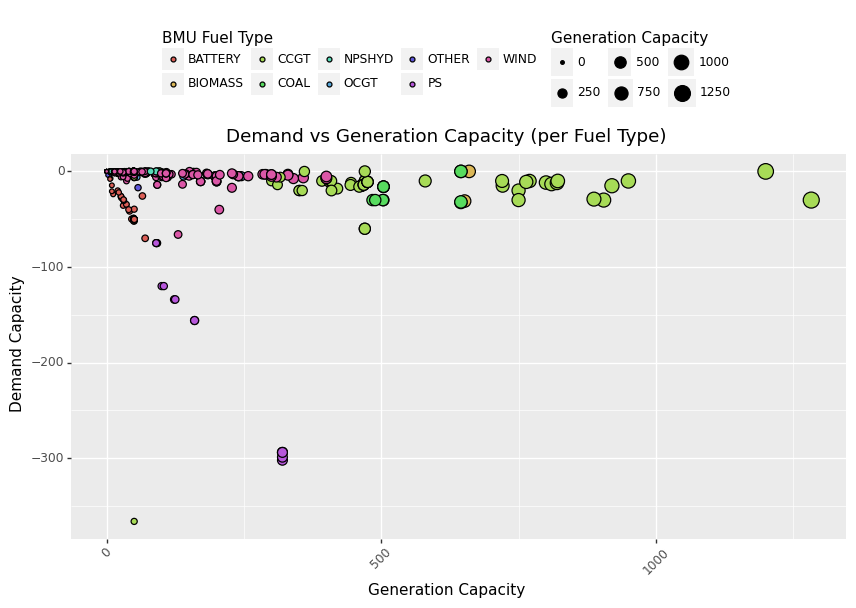

<ggplot: (8736476081861)>

In [ ]:
(ggplot(data) 
 + aes(x="Generation Capacity", y="Demand Capacity", fill='BMU Fuel Type', size='Generation Capacity')
 + geom_point()
 + theme(axis_text_x=element_text(rotation=45))
 + ggtitle('Demand vs Generation Capacity (per Fuel Type)')
 + guides(color=guide_legend(nrow=1))
 + theme(figure_size=(10, 5), legend_position='top', legend_box_spacing=.3)
)

In [ ]:
(ggplot(data) 
 + aes(x="Generation Capacity", y="Demand Capacity", fill='BMU Fuel Type', size='Generation Capacity')
 + geom_point(size=3)
 + theme(axis_text_x=element_text(rotation=45))
 + ggtitle('')
 + guides(color=guide_legend(nrow=1))
 + theme(figure_size=(20, 10), legend_position='top', legend_box_spacing=.3)
 + facet_wrap('BMU Fuel Type', ncol=3, scales='Free')
)

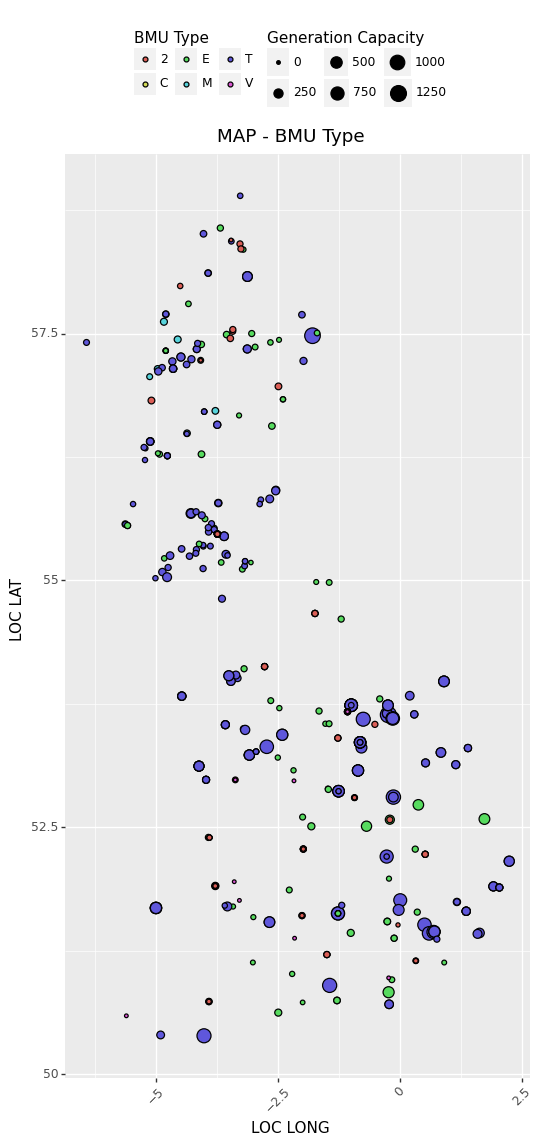

<ggplot: (8736476587360)>

In [ ]:
(ggplot(data) 
 + aes(x="LOC LONG", y="LOC LAT", fill="BMU Type", size="Generation Capacity")
 + geom_point()
 + theme(axis_text_x=element_text(rotation=45))
 + ggtitle('MAP - BMU Type & Generation Capacity')
 + guides(color=guide_legend(nrow=1))
 + theme(figure_size=(6, 12), legend_position='top', legend_box_spacing=.3)
)

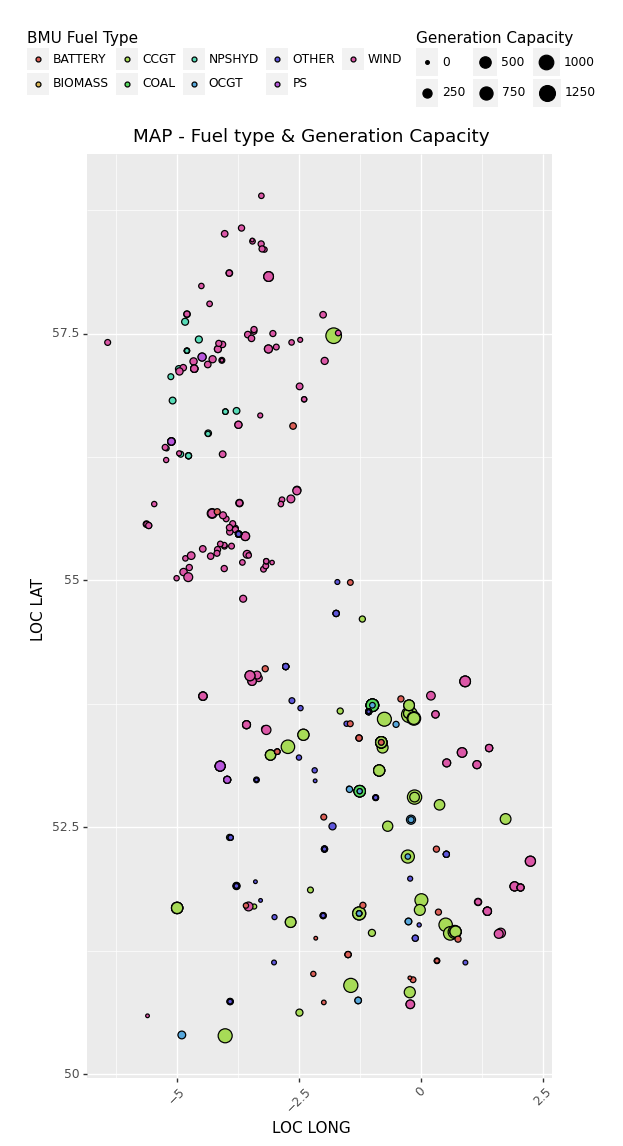

<ggplot: (8736466185201)>

In [ ]:
(ggplot(data) 
 + aes(x="LOC LONG", y="LOC LAT", fill="BMU Fuel Type", size="Generation Capacity")
 + geom_point()
 + theme(axis_text_x=element_text(rotation=45))
 + ggtitle('MAP - Fuel type & Generation Capacity')
 + guides(color=guide_legend(nrow=1))
 + theme(figure_size=(6, 12), legend_position='top', legend_box_spacing=.3)
)

In [ ]:
data['PC Flag'].unique()

array(['Dynamic', 'Production (P)', 'Consumption (C)'], dtype=object)

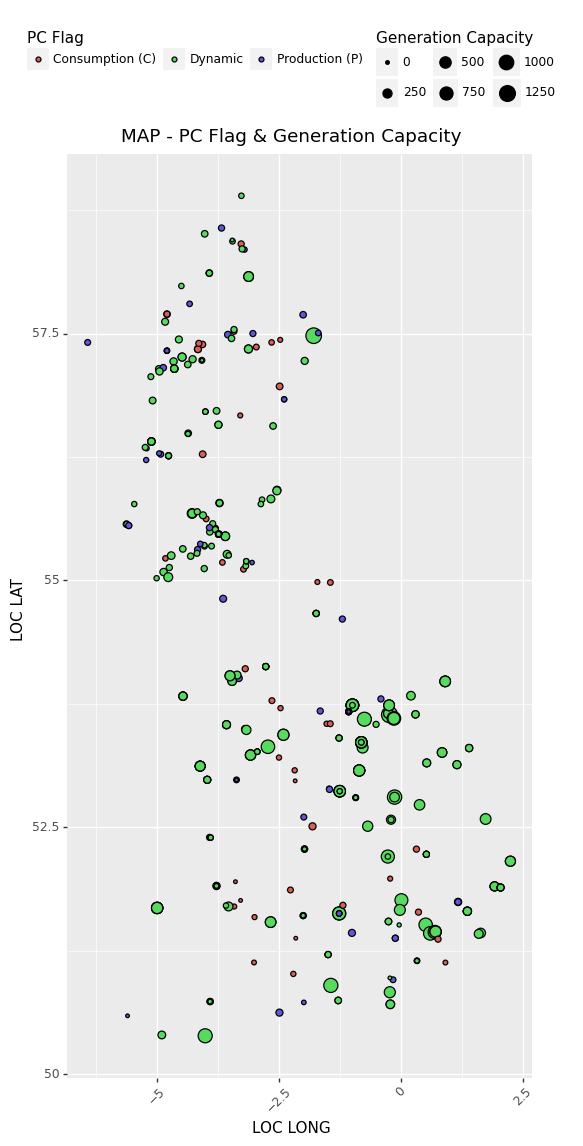

<ggplot: (8736475732236)>

In [ ]:
(ggplot(data) 
 + aes(x="LOC LONG", y="LOC LAT", fill='PC Flag', size='Generation Capacity')
 + geom_point()
 + theme(axis_text_x=element_text(rotation=45))
 + ggtitle('MAP - PC Flag & Generation Capacity')
 + guides(color=guide_legend(nrow=1))
 + theme(figure_size=(6, 12), legend_position='top', legend_box_spacing=.3)
)

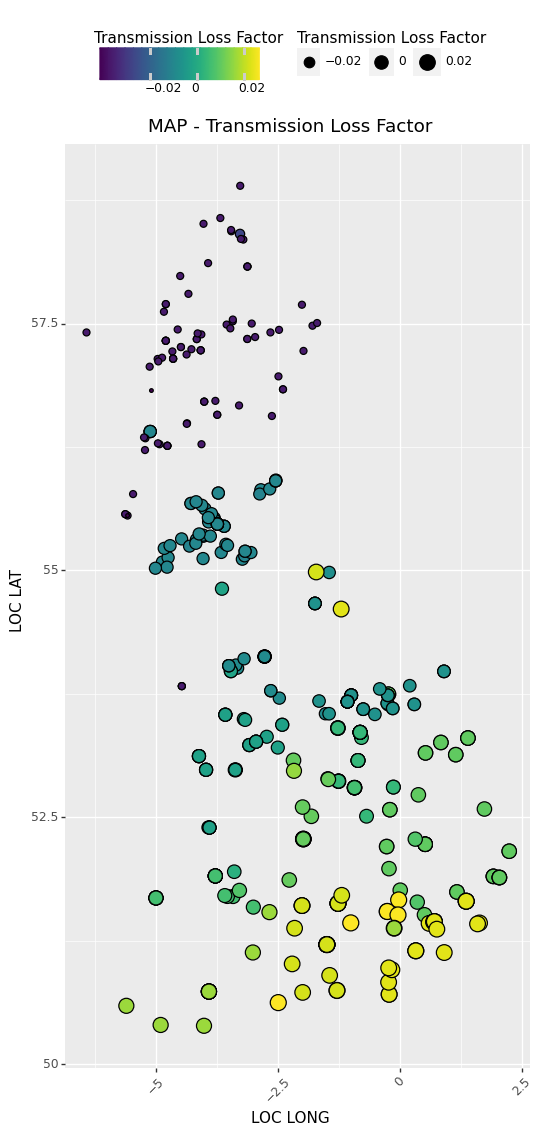

<ggplot: (8736476069468)>

In [ ]:
(ggplot(data) 
 + aes(x="LOC LONG", y="LOC LAT", fill="Transmission Loss Factor", size="Transmission Loss Factor")
 + geom_point()
 + theme(axis_text_x=element_text(rotation=45))
 + ggtitle('MAP - Transmission Loss Factor')
 + guides(color=guide_legend(nrow=1))
 + theme(figure_size=(6, 12), legend_position='top', legend_box_spacing=.3)
)

#### - NOT USEFUL

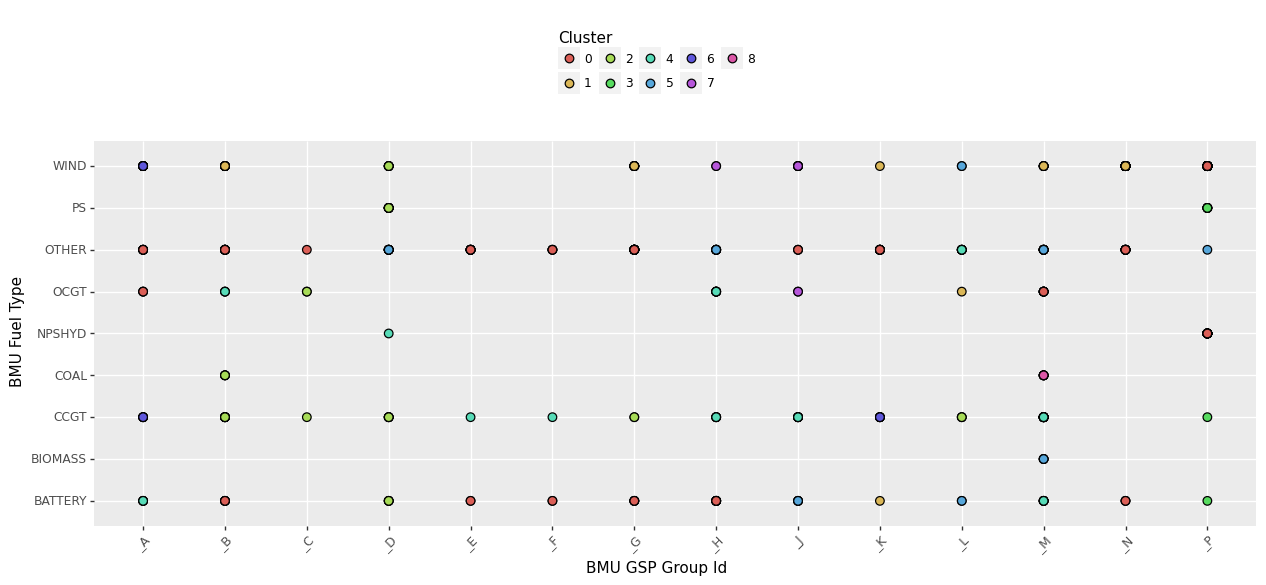

<ggplot: (8743813207989)>

In [ ]:
(ggplot(data) 
 + aes(x="BMU GSP Group Id", y="BMU Fuel Type", fill='Cluster')
 + geom_point(size=3)
 + theme(axis_text_x=element_text(rotation=45))
 + ggtitle('')
 + guides(color=guide_legend(nrow=1))
 + theme(figure_size=(15, 5), legend_position='top', legend_box_spacing=.3)
)

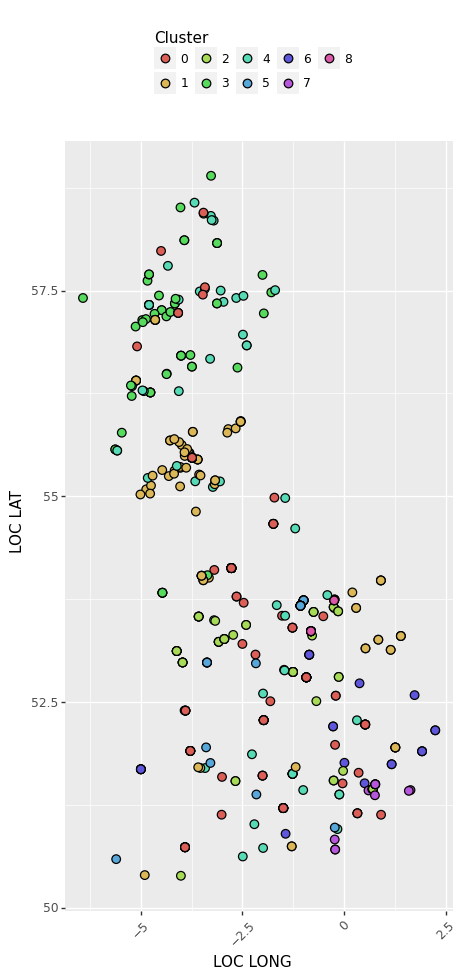

<ggplot: (8743814214254)>

In [ ]:
(ggplot(data) 
 + aes(x="LOC LONG", y="LOC LAT", fill='Cluster')
 + geom_point(size=3)
 + theme(axis_text_x=element_text(rotation=45))
 + ggtitle('')
 + guides(color=guide_legend(nrow=1))
 + theme(figure_size=(5, 10), legend_position='top', legend_box_spacing=.3)
)

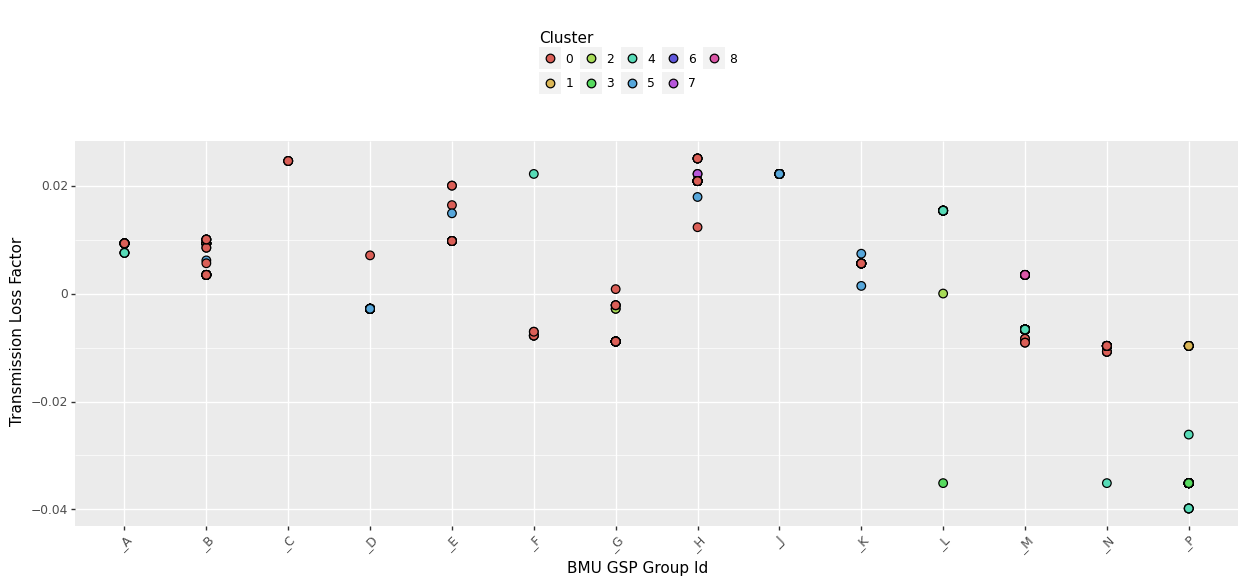

<ggplot: (8743808370773)>

In [ ]:
(ggplot(data) 
 + aes(x="BMU GSP Group Id", y="Transmission Loss Factor", fill='Cluster')
 + geom_point(size=3)
 + theme(axis_text_x=element_text(rotation=45))
 + ggtitle('')
 + guides(color=guide_legend(nrow=1))
 + theme(figure_size=(15, 5), legend_position='top', legend_box_spacing=.3)
)

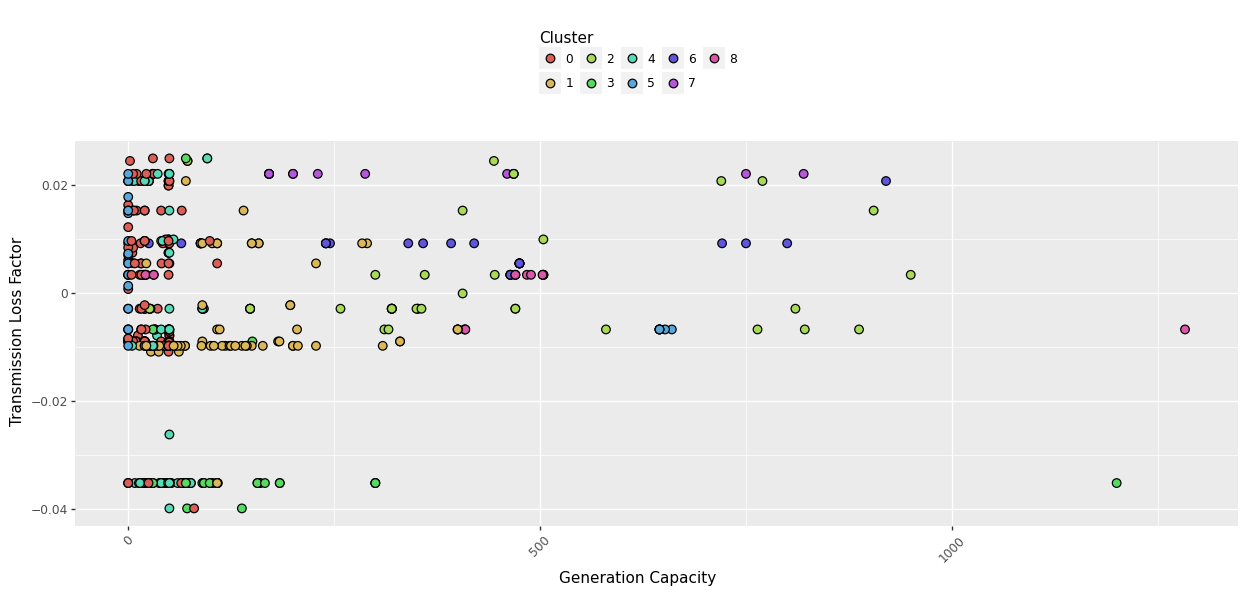

<ggplot: (8743808408706)>

In [ ]:
(ggplot(data) 
 + aes(x="Generation Capacity", y="Transmission Loss Factor", fill='Cluster')
 + geom_point(size=3)
 + theme(axis_text_x=element_text(rotation=45))
 + ggtitle('')
 + guides(color=guide_legend(nrow=1))
 + theme(figure_size=(15, 5), legend_position='top', legend_box_spacing=.3)
)

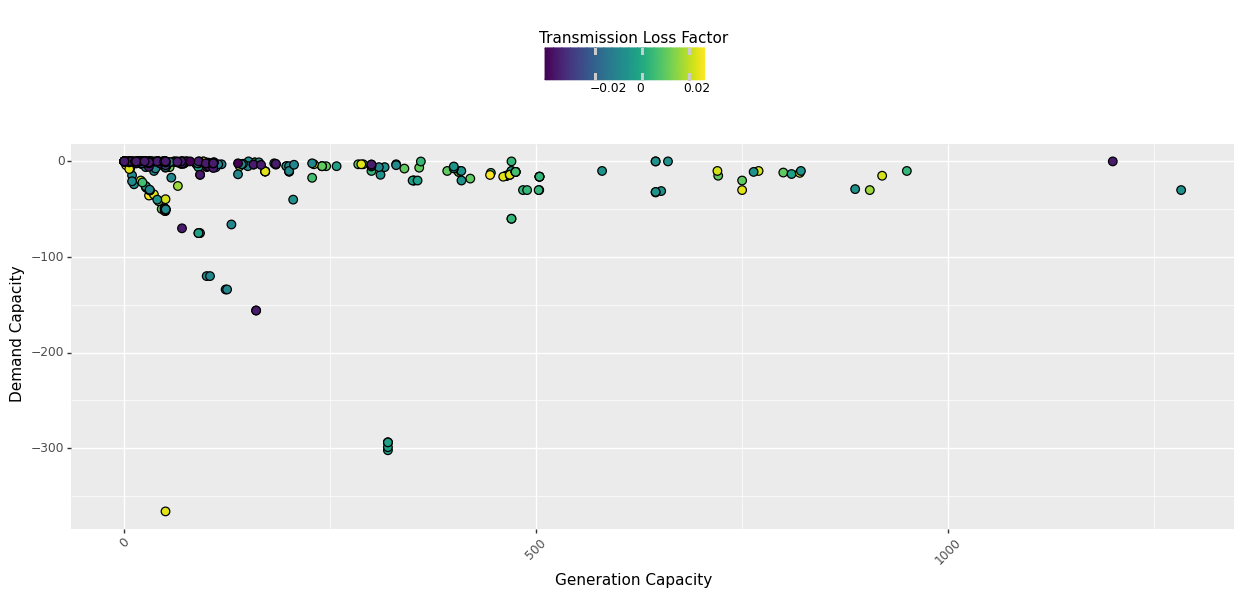

<ggplot: (8743812617694)>

In [ ]:
(ggplot(data) 
 + aes(x="Generation Capacity", y="Demand Capacity", fill='Transmission Loss Factor')
 + geom_point(size=3)
 + theme(axis_text_x=element_text(rotation=45))
 + ggtitle('')
 + guides(color=guide_legend(nrow=1))
 + theme(figure_size=(15, 5), legend_position='top', legend_box_spacing=.3)
)

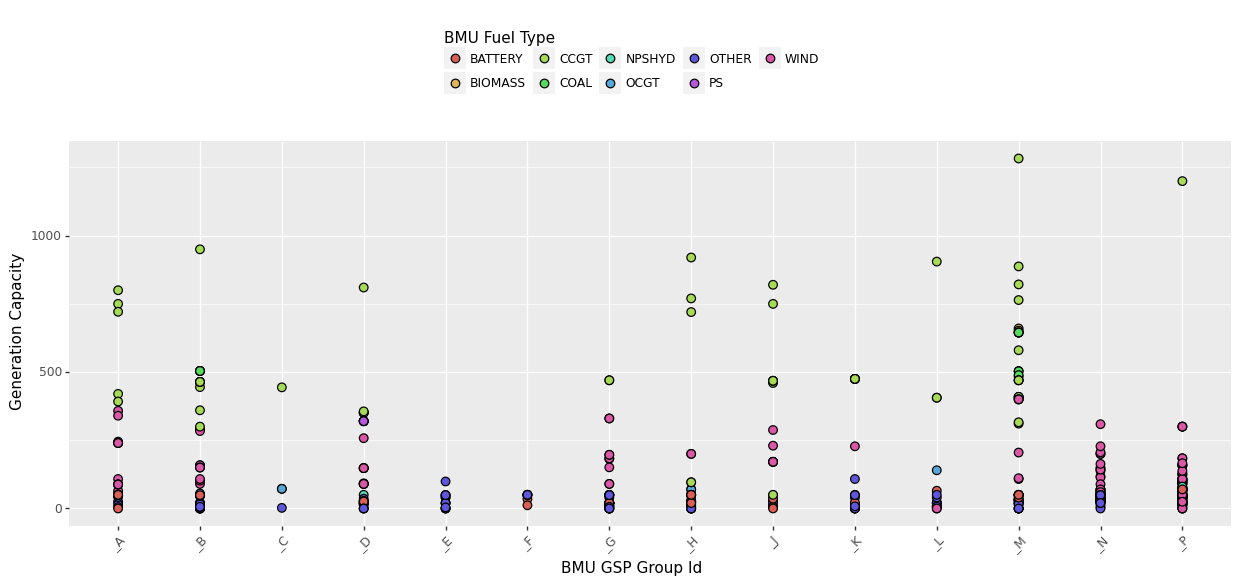

<ggplot: (8743808451215)>

In [ ]:
(ggplot(data) 
 + aes(x="BMU GSP Group Id", y="Generation Capacity", fill='BMU Fuel Type')
 + geom_point(size=3)
 + theme(axis_text_x=element_text(rotation=45))
 + ggtitle('')
 + guides(color=guide_legend(nrow=1))
 + theme(figure_size=(15, 5), legend_position='top', legend_box_spacing=.3)
)

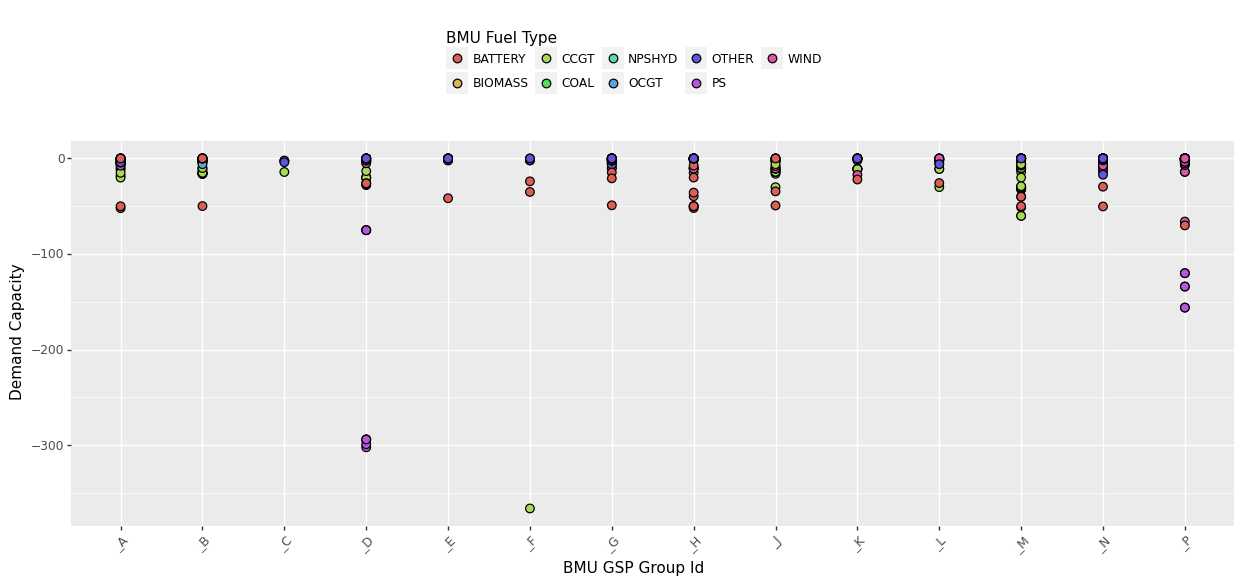

<ggplot: (8743808180369)>

In [ ]:
(ggplot(data) 
 + aes(x="BMU GSP Group Id", y="Demand Capacity", fill='BMU Fuel Type')
 + geom_point(size=3)
 + theme(axis_text_x=element_text(rotation=45))
 + ggtitle('')
 + guides(color=guide_legend(nrow=1))
 + theme(figure_size=(15, 5), legend_position='top', legend_box_spacing=.3)
)

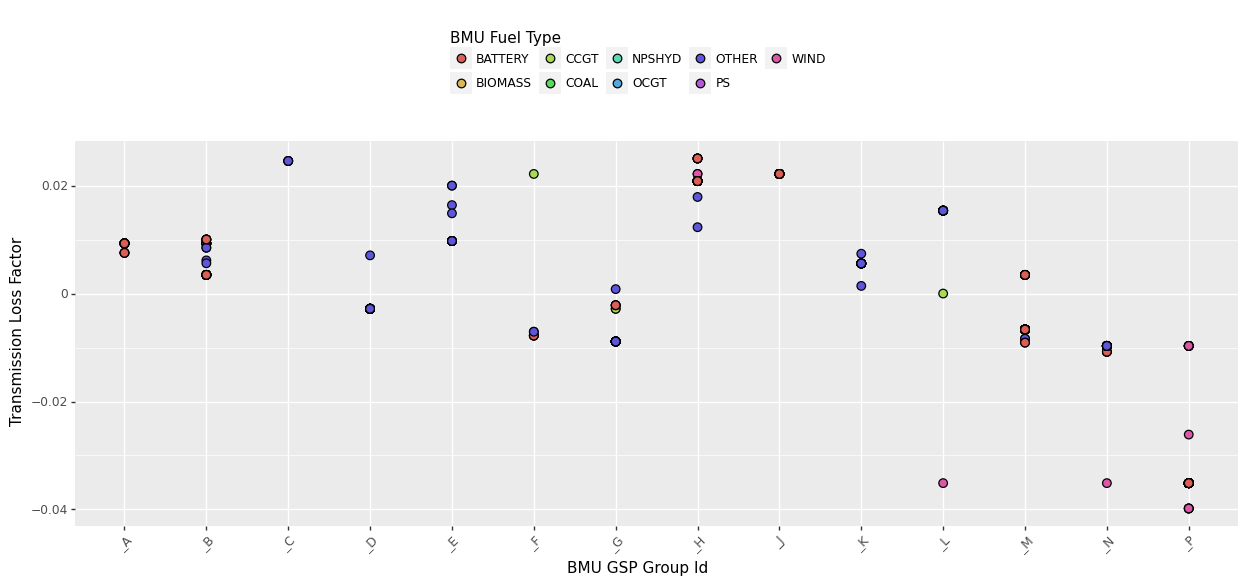

<ggplot: (8743808180504)>

In [ ]:
(ggplot(data) 
 + aes(x="BMU GSP Group Id", y="Transmission Loss Factor", fill='BMU Fuel Type')
 + geom_point(size=3)
 + theme(axis_text_x=element_text(rotation=45))
 + ggtitle('')
 + guides(color=guide_legend(nrow=1))
 + theme(figure_size=(15, 5), legend_position='top', legend_box_spacing=.3)
)

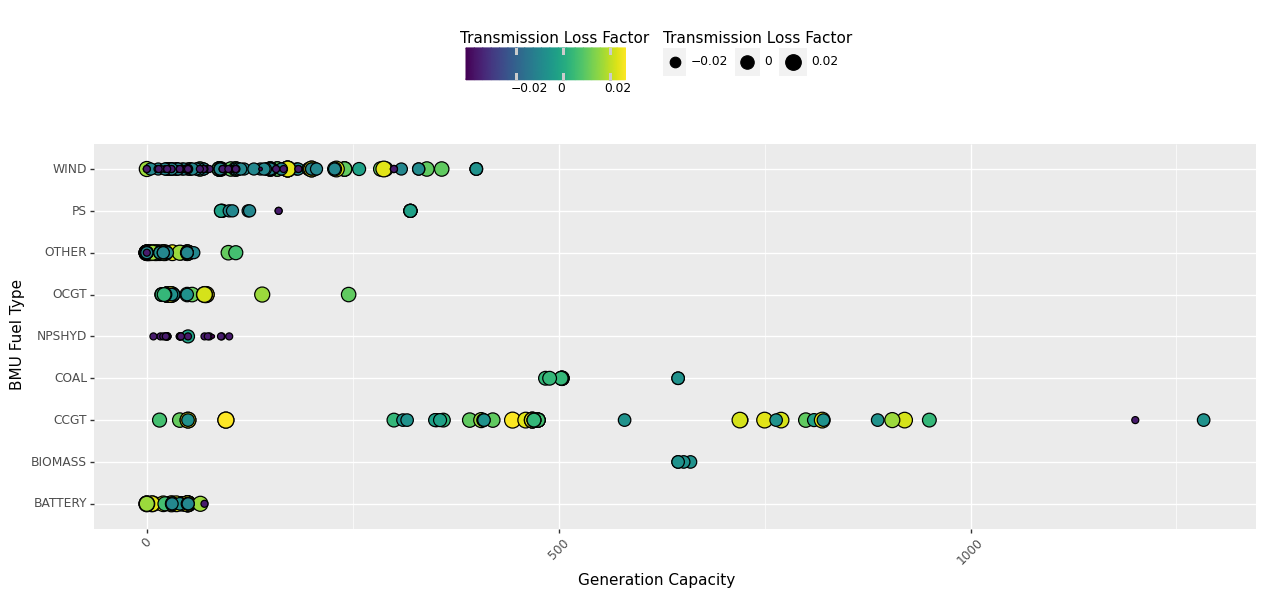

<ggplot: (8743812507531)>

In [ ]:
(ggplot(data) 
 + aes(x="Generation Capacity", y='BMU Fuel Type', fill='Transmission Loss Factor', size='Transmission Loss Factor')
 + geom_point()
 + theme(axis_text_x=element_text(rotation=45))
 + ggtitle('')
 + guides(color=guide_legend(nrow=1))
 + theme(figure_size=(15, 5), legend_position='top', legend_box_spacing=.3)
)